<center><h1>s4019548 - Nguyen Khanh An</h1></center>
<center><h1>Assignment 1</h1></center>

In [3]:
!python --version

Python 3.12.4


___This project is running on Python 3.12.4___

## ___1. Introduction___

In today's world, the ability to accurately predict human life expectancy has proven to be an invaluable asset to many industries. This project's goal is to deliver on that potential by developing a machine learning model that intake attribute's data to forecast human life expectancy.

The final solution of this project will be integrated into the decision-making process of various fields. For example, healthcare will use it to assist in strategic planning and preventive care initiatives, insurers will use it to refine risk assessment and pricing strategies, and government will be able to host effective health campaigns and allocate resources efficiently.

This project will go through the process of the machine learning procedure, which involves:
* ___Exploratory Data Analysis:___ Exploring the given data using various techniques to gain further insights.
* ___Data Preparation:___ Preprocess the data to be in an appropriate format 
* ___Model Analysis:___ Explore different models and analyse their output.
* ___Ultimate Judgement:___ Give an ultimate judgement for the project.
* ___Test Dataset Prediction:___ Predict the target variable based on the given test dataset.
Given the nature of the dataset and the goal of predicting life expectancy, this will be a model built around supervised learning. And since the target variable (life expectancy) is continuous, a regression technique is the most suitable.

## ___2. Exploratory Data Analysis___

In this section I will be performing Exploratory Data Analysis on the given dataset. This will include:
* Get the data
* Data overview
* Feature understanding
* Correlation between attributes

All these process's purpose is to give a comprehensive view of the dataset, so that I can identify patterns, detect anomalies, and extract meaningful insights to inform future modeling and decision-making processes.

I will primary using these libraries to assist us with the EDA process:

In [10]:
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

In [11]:
pd.set_option('display.max_columns', None)

In [12]:
print("Numpy version:", np.__version__)
print("Pandas version:", pd.__version__)
print("Matplotlib version:", matplotlib.__version__)
print("Seaborn version:", sns.__version__)

Numpy version: 1.26.4
Pandas version: 2.2.2
Matplotlib version: 3.8.4
Seaborn version: 0.13.2


* ___Numpy (1.26.4):___ A library for numerical computing in Python, supporting the creation and manipulation of large, multidimensional arrays and matrices, along with mathematical functions to operate on those arrays.
* ___Pandas (2.2.2):___ A data manipulation and analysis library built on top of NumPy, offering data structure like Series (one-dimensional) and DataFrame (two-dimensional) which are invaluable for handing and analyzing structured data, along with tools for data cleaning, aggregation, filtering and visualization. 
* ___Matplotlib (3.8.4):___ A data visualization library in Python, allowing users to create a variety of plots, such as line charts, bar graphs, scatter plots and histograms.
* ___Seaborn (0.13.2):___ A statistical data visualization library built on top of Matplotlib, providing a high-level interface for creating informative and attractive graphs. It simplifies complex visualizations like heatmaps, violin plots, and pair plots, making it useful for exploratory data analysis.

### ___2.1. Get the data___

First, I will retrieve the datasets, which currently reside in two csv files, the `train.csv` and `test.csv` by using Pandas `read_csv()` command, which will load the input files into a Pandas `DataFrame`.

In [16]:
train_data = pd.read_csv('data/train.csv') # Read the train dataset
test_data = pd.read_csv('data/test.csv') # Read the train dataset

* ___Given data:___ There are two dataframe that I am going to be using, `train_data` and `test_data`, which are the train dataset and the test dataset respectively. The train dataset will be used for model development, and the test dataset will be used for the model to predict the target attribute, human life expectancy, based on the attribute of the test dataset. I am going with the assumption that data splitting procedure has been taken, meaning proper randomization.

### ___2.2. Data overview___

Now that the data is here in form of `DataFrame`, I am now going to explore the data through various techniques such as descriptive statistics, data visualization, and correlation analysis.

In [20]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2071 entries, 0 to 2070
Data columns (total 24 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   ID                            2071 non-null   int64  
 1   TARGET_LifeExpectancy         2071 non-null   float64
 2   Country                       2071 non-null   int64  
 3   Year                          2071 non-null   int64  
 4   Status                        2071 non-null   int64  
 5   AdultMortality                2070 non-null   float64
 6   AdultMortality-Male           2071 non-null   int64  
 7   AdultMortality-Female         2071 non-null   int64  
 8   SLS                           2071 non-null   int64  
 9   Alcohol                       2067 non-null   float64
 10  PercentageExpenditure         2062 non-null   float64
 11  Measles                       2070 non-null   float64
 12  BMI                           2063 non-null   float64
 13  Und

In [21]:
train_data.head()

,ID,TARGET_LifeExpectancy,Country,Year,Status,AdultMortality,AdultMortality-Male,AdultMortality-Female,SLS,Alcohol,PercentageExpenditure,Measles,BMI,Under5LS,Polio,TotalExpenditure,Diphtheria,HIV-AIDS,GDP,Population,Thinness1-19years,Thinness5-9years,IncomeCompositionOfResources,Schooling
0,1,67.1,146,2017,0,263.0,262,264,62,0.01,71.279624,1154.0,19.1,83.0,6.0,8.16,65.0,0.1,654.37,33736494.0,17.2,17.3,0.479,3.178050
1,2,59.8,146,2016,0,271.0,278,264,64,0.01,73.523582,492.0,18.6,86.0,58.0,8.18,62.0,0.1,686.22,327582.0,17.5,17.5,0.476,3.162278
2,3,57.6,146,2015,0,268.0,246,290,66,0.01,73.219243,430.0,18.1,89.0,62.0,8.13,64.0,0.1,707.55,31731688.0,17.7,17.7,0.470,3.146427
3,4,55.5,146,2014,0,272.0,248,296,69,0.01,78.184215,2787.0,17.6,93.0,67.0,8.52,67.0,0.1,750.35,3696958.0,17.9,18.0,0.463,3.130495
4,5,57.7,146,2013,0,275.0,278,272,71,0.01,7.097109,3013.0,17.2,97.0,68.0,7.87,68.0,0.1,71.16,2978599.0,18.2,18.2,0.454,3.082207


In [22]:
train_data.describe()

,ID,TARGET_LifeExpectancy,Country,Year,Status,AdultMortality,AdultMortality-Male,AdultMortality-Female,SLS,Alcohol,PercentageExpenditure,Measles,BMI,Under5LS,Polio,TotalExpenditure,Diphtheria,HIV-AIDS,GDP,Population,Thinness1-19years,Thinness5-9years,IncomeCompositionOfResources,Schooling
count,2071.000000,2071.000000,2071.000000,2071.000000,2071.000000,2070.00000,2071.000000,2071.000000,2071.000000,2067.000000,2062.000000,2070.000000,2063.000000,2070.000000,2070.000000,2061.000000,2071.000000,2068.000000,2062.000000,2.063000e+03,2070.000000,2070.000000,2066.000000,2064.000000
mean,1036.000000,69.274505,95.360212,2009.518590,0.185418,162.82029,161.908257,163.759536,33.079672,4.693009,764.429066,2096.541063,37.572952,45.849275,82.720773,5.881827,82.753259,1.632544,7304.336600,1.205231e+07,4.939034,4.977971,0.609866,3.372332
std,597.990524,9.482281,54.861641,4.614147,0.388730,118.89928,119.442235,118.800292,135.832868,4.205270,2083.501026,9961.872486,19.946367,185.292194,23.192604,2.557347,23.130969,4.784991,15179.036764,6.403752e+07,4.697848,4.786593,0.216610,0.590975
min,1.000000,37.300000,0.000000,2002.000000,0.000000,1.00000,0.000000,2.000000,0.000000,0.010000,0.000000,0.000000,1.000000,0.000000,3.000000,0.370000,2.000000,0.100000,1.880000,3.400000e+01,0.100000,0.100000,0.000000,0.000000
25%,518.500000,63.000000,50.000000,2006.000000,0.000000,74.00000,74.000000,74.000000,0.000000,0.615000,5.688828,0.000000,18.800000,0.000000,77.000000,4.180000,78.000000,0.100000,413.730000,1.274450e+05,1.600000,1.500000,0.463000,3.065942
50%,1036.000000,71.200000,94.000000,2010.000000,0.000000,144.00000,142.000000,144.000000,3.000000,3.820000,68.943329,19.000000,42.100000,4.000000,93.000000,5.640000,93.000000,0.100000,1390.315000,6.477440e+05,3.200000,3.300000,0.655500,3.449638
75%,1553.500000,76.000000,144.000000,2014.000000,0.000000,228.00000,228.000000,230.000000,22.000000,7.840000,429.434148,425.750000,55.900000,27.000000,97.000000,7.430000,97.000000,0.800000,5746.287500,5.364814e+06,7.375000,7.400000,0.770000,3.741657
max,2071.000000,92.700000,192.000000,2017.000000,1.000000,699.00000,704.000000,722.000000,1800.000000,17.870000,19479.911610,212183.000000,87.300000,2500.000000,99.000000,17.600000,99.000000,50.600000,133473.470000,1.293859e+09,27.700000,28.600000,0.948000,4.381780


In [23]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 867 entries, 0 to 866
Data columns (total 23 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   ID                            867 non-null    int64  
 1   Country                       867 non-null    int64  
 2   Year                          867 non-null    int64  
 3   Status                        867 non-null    int64  
 4   AdultMortality                867 non-null    int64  
 5   AdultMortality-Male           867 non-null    int64  
 6   AdultMortality-Female         867 non-null    int64  
 7   SLS                           867 non-null    int64  
 8   Alcohol                       867 non-null    float64
 9   PercentageExpenditure         867 non-null    float64
 10  Measles                       867 non-null    int64  
 11  BMI                           867 non-null    float64
 12  Under5LS                      867 non-null    int64  
 13  Polio

In [24]:
test_data.head()

,ID,Country,Year,Status,AdultMortality,AdultMortality-Male,AdultMortality-Female,SLS,Alcohol,PercentageExpenditure,Measles,BMI,Under5LS,Polio,TotalExpenditure,Diphtheria,HIV-AIDS,GDP,Population,Thinness1-19years,Thinness5-9years,IncomeCompositionOfResources,Schooling
0,1,120,2017,0,335,314,356,66,6.35,0.000000,118,23.3,98,7.0,3.84,64,1.9,4139.29,2785935.0,8.3,8.2,0.531,3.376389
1,2,120,2016,0,348,338,358,67,8.33,23.965612,11699,22.7,101,68.0,3.31,64,2.0,536.83,2692466.0,8.5,8.3,0.527,3.376389
2,3,120,2015,0,355,362,348,69,8.10,35.958573,8523,22.1,105,67.0,4.26,77,2.3,542.77,2599834.0,8.6,8.5,0.523,3.376389
3,4,120,2014,0,358,348,368,72,8.24,256.122524,4458,21.5,110,75.0,3.30,75,2.6,5150.04,259615.0,8.8,8.6,0.508,3.209361
4,5,120,2013,0,361,368,354,75,8.06,239.891392,1449,21.0,115,73.0,3.38,71,2.5,4815.02,24218565.0,8.9,8.8,0.495,3.065942


In [25]:
test_data.describe()

,ID,Country,Year,Status,AdultMortality,AdultMortality-Male,AdultMortality-Female,SLS,Alcohol,PercentageExpenditure,Measles,BMI,Under5LS,Polio,TotalExpenditure,Diphtheria,HIV-AIDS,GDP,Population,Thinness1-19years,Thinness5-9years,IncomeCompositionOfResources,Schooling
count,867.000000,867.000000,867.000000,867.000000,867.000000,867.000000,867.000000,867.000000,867.000000,867.000000,867.000000,867.000000,867.000000,867.000000,867.000000,867.000000,867.000000,867.000000,8.670000e+02,867.000000,867.000000,867.000000,867.000000
mean,434.000000,97.908881,2009.519031,0.147636,168.310265,167.351788,169.268743,23.673587,4.323230,675.455038,3193.158016,39.393195,32.838524,81.675894,5.926228,80.869666,2.002999,6768.605686,4.977211e+06,4.458247,4.474740,0.638852,3.444089
std,250.425638,59.047382,4.615772,0.354943,136.148089,136.339678,136.521130,54.762901,3.624657,1742.603943,14422.950469,20.254718,71.774807,24.150902,2.287944,25.153943,5.716692,14405.688854,1.069932e+07,3.614439,3.704803,0.185802,0.538432
min,1.000000,1.000000,2002.000000,0.000000,1.000000,0.000000,2.000000,0.000000,0.010000,0.000000,0.000000,2.000000,0.000000,3.000000,1.120000,3.000000,0.100000,4.130000,1.350000e+02,0.100000,0.100000,0.000000,0.000000
25%,217.500000,41.000000,2006.000000,0.000000,71.000000,68.000000,72.000000,0.000000,1.155000,2.005443,0.000000,19.800000,0.000000,78.500000,4.325000,78.000000,0.100000,413.730000,1.274450e+05,1.400000,1.400000,0.483000,3.154352
50%,434.000000,104.000000,2010.000000,0.000000,143.000000,140.000000,144.000000,2.000000,3.240000,60.341451,13.000000,44.600000,3.000000,92.000000,5.830000,91.000000,0.100000,1272.850000,3.331430e+05,3.500000,3.400000,0.677000,3.535534
75%,650.500000,155.000000,2014.000000,0.000000,224.000000,223.000000,226.000000,23.500000,7.435000,466.703840,243.000000,56.600000,29.500000,97.000000,7.500000,97.000000,0.600000,4755.220000,3.253793e+06,6.800000,6.700000,0.778500,3.781534
max,867.000000,191.000000,2017.000000,1.000000,723.000000,742.000000,778.000000,490.000000,13.200000,11734.853810,182485.000000,82.800000,608.000000,99.000000,11.790000,99.000000,43.500000,99192.600000,5.414673e+07,16.300000,19.100000,0.937000,4.549725


As for initial impression goes, there are a total of 24 columns of data for the train dataset and 23 columns for the test dataset. One of which is unusable for the development of the model, the "ID" column, since its only purpose is to index the rows of data. There are 2071 entries in the train dataset, which is quite small for a machine learning project. Since the `TARGET_LifeExpectancy` column is clearly labeled as `TARGET`, and based on the purpose of this project, this effectively mean that this is the target attribute for the model. It is also the only attribute's difference between the train and test dataset, as the test dataset is missing the `TARGET_LifeExpectancy` column, since one of the task of this project is to predict the target variable of the test dataset. Although all the attributes are represented as numerical values, it does not mean that they all represent continuous numerical quantities; some attributes may use numbers for other purposes, such as indexing, categorical labeling, or representing boolean values. Not accounting for this when in the data preparation process will significantly hinder the accuracy of the model.

As I review all the attribute, I notice that some of the names are either confusing or are written incorrectly:
* ___TARGET-LifeExpectancy:___ The "TARGET" moniker might cause some confusion when not considering the context of machine learning.
* ___Thinness1-19years:___ This attribute measures the prevalence of thinness among age 10 to 19, and yet it is written as 1-19.

So I will be changing "TARGET-LifeExpectancy" to "LifeExpectancy" and "Thinness1-19years" to "Thinness10-19years" for accuracy and clarity purposes.

In [32]:
# Rename "TARGET-LifeExpectancy" to "LifeExpectancy" and "Thinness1-19years" to "Thinness10-19years"
train_data = train_data.rename(columns={"TARGET_LifeExpectancy": "LifeExpectancy",
                 "Thinness1-19years": "Thinness10-19years"}) 
test_data = test_data.rename(columns={"Thinness1-19years": "Thinness10-19years"})

Based on the description of the dataset, there are 3 attributes containing inaccurate data:
* ___SLS:___ This attribute is representing the amount of SLS per 1000, and yet there are values which are over 1000.
* ___Measles:___ This attribute is representing the amount of reported measles cases per 1000 people, but there are values above 1000.
* ___Under5LS:___ This attribute is representing the amount of 5LS per 1000, and yet there are values which are over 1000.

This issues will be accounted for when visualising the data and dealt with in the `Prepare the data` section.

There appears to be missing data coming from multiple attributes in the train dataset and none from the test dataset. This is good for predicting the test dataset as I do not have to worry about missing data interrupting the prediction process, but it does mean that the model training process cannot be proceed until the issue is dealt with. This process will happen in the `Prepare the data` section.

In [42]:
# Calculate the percentage of missing data
missing_data = (train_data.isnull().mean() * 100).round(2)
print(missing_data)

ID                              0.00
LifeExpectancy                  0.00
Country                         0.00
Year                            0.00
Status                          0.00
AdultMortality                  0.05
AdultMortality-Male             0.00
AdultMortality-Female           0.00
SLS                             0.00
Alcohol                         0.19
PercentageExpenditure           0.43
Measles                         0.05
BMI                             0.39
Under5LS                        0.05
Polio                           0.05
TotalExpenditure                0.48
Diphtheria                      0.00
HIV-AIDS                        0.14
GDP                             0.43
Population                      0.39
Thinness10-19years              0.05
Thinness5-9years                0.05
IncomeCompositionOfResources    0.24
Schooling                       0.34
dtype: float64


In [44]:
print("Amount of columns containing null value:", train_data.isnull().any().sum())

Amount of columns containing null value: 15


* ___Missing data statistics:___ There are a total of 15 columns containing N/A values, most of them has the percentage of missing values below 1%.

In [47]:
missing_data[missing_data > 0].index

Index(['AdultMortality', 'Alcohol', 'PercentageExpenditure', 'Measles', 'BMI',
       'Under5LS', 'Polio', 'TotalExpenditure', 'HIV-AIDS', 'GDP',
       'Population', 'Thinness10-19years', 'Thinness5-9years',
       'IncomeCompositionOfResources', 'Schooling'],
      dtype='object')

* ___Column containing missing data:___ 'AdultMortality', 'Alcohol', 'PercentageExpenditure', 'Measles', 'BMI',
       'Under5LS', 'Polio', 'TotalExpenditure', 'HIV-AIDS', 'GDP',
       'Population', 'Thinness10-19years', 'Thinness5-9years',
       'IncomeCompositionOfResources', 'Schooling'.

In [50]:
duplicates = train_data[train_data.duplicated()]
print(duplicates)

Empty DataFrame
Columns: [ID, LifeExpectancy, Country, Year, Status, AdultMortality, AdultMortality-Male, AdultMortality-Female, SLS, Alcohol, PercentageExpenditure, Measles, BMI, Under5LS, Polio, TotalExpenditure, Diphtheria, HIV-AIDS, GDP, Population, Thinness10-19years, Thinness5-9years, IncomeCompositionOfResources, Schooling]
Index: []


* ___Duplicate entries:___ There appears to be no occurance of duplicate entries.

### ___2.3. Feature understanding___

Next, I will proceed to create histograms and box plots for every attribute for distribution analysis, note that the `ID` column will not be included simply because there is not much point in analyzing the index of a row, and the columns mentioned in the outlier data section will have all the data over 1000 excluded from the histograms and box plots.

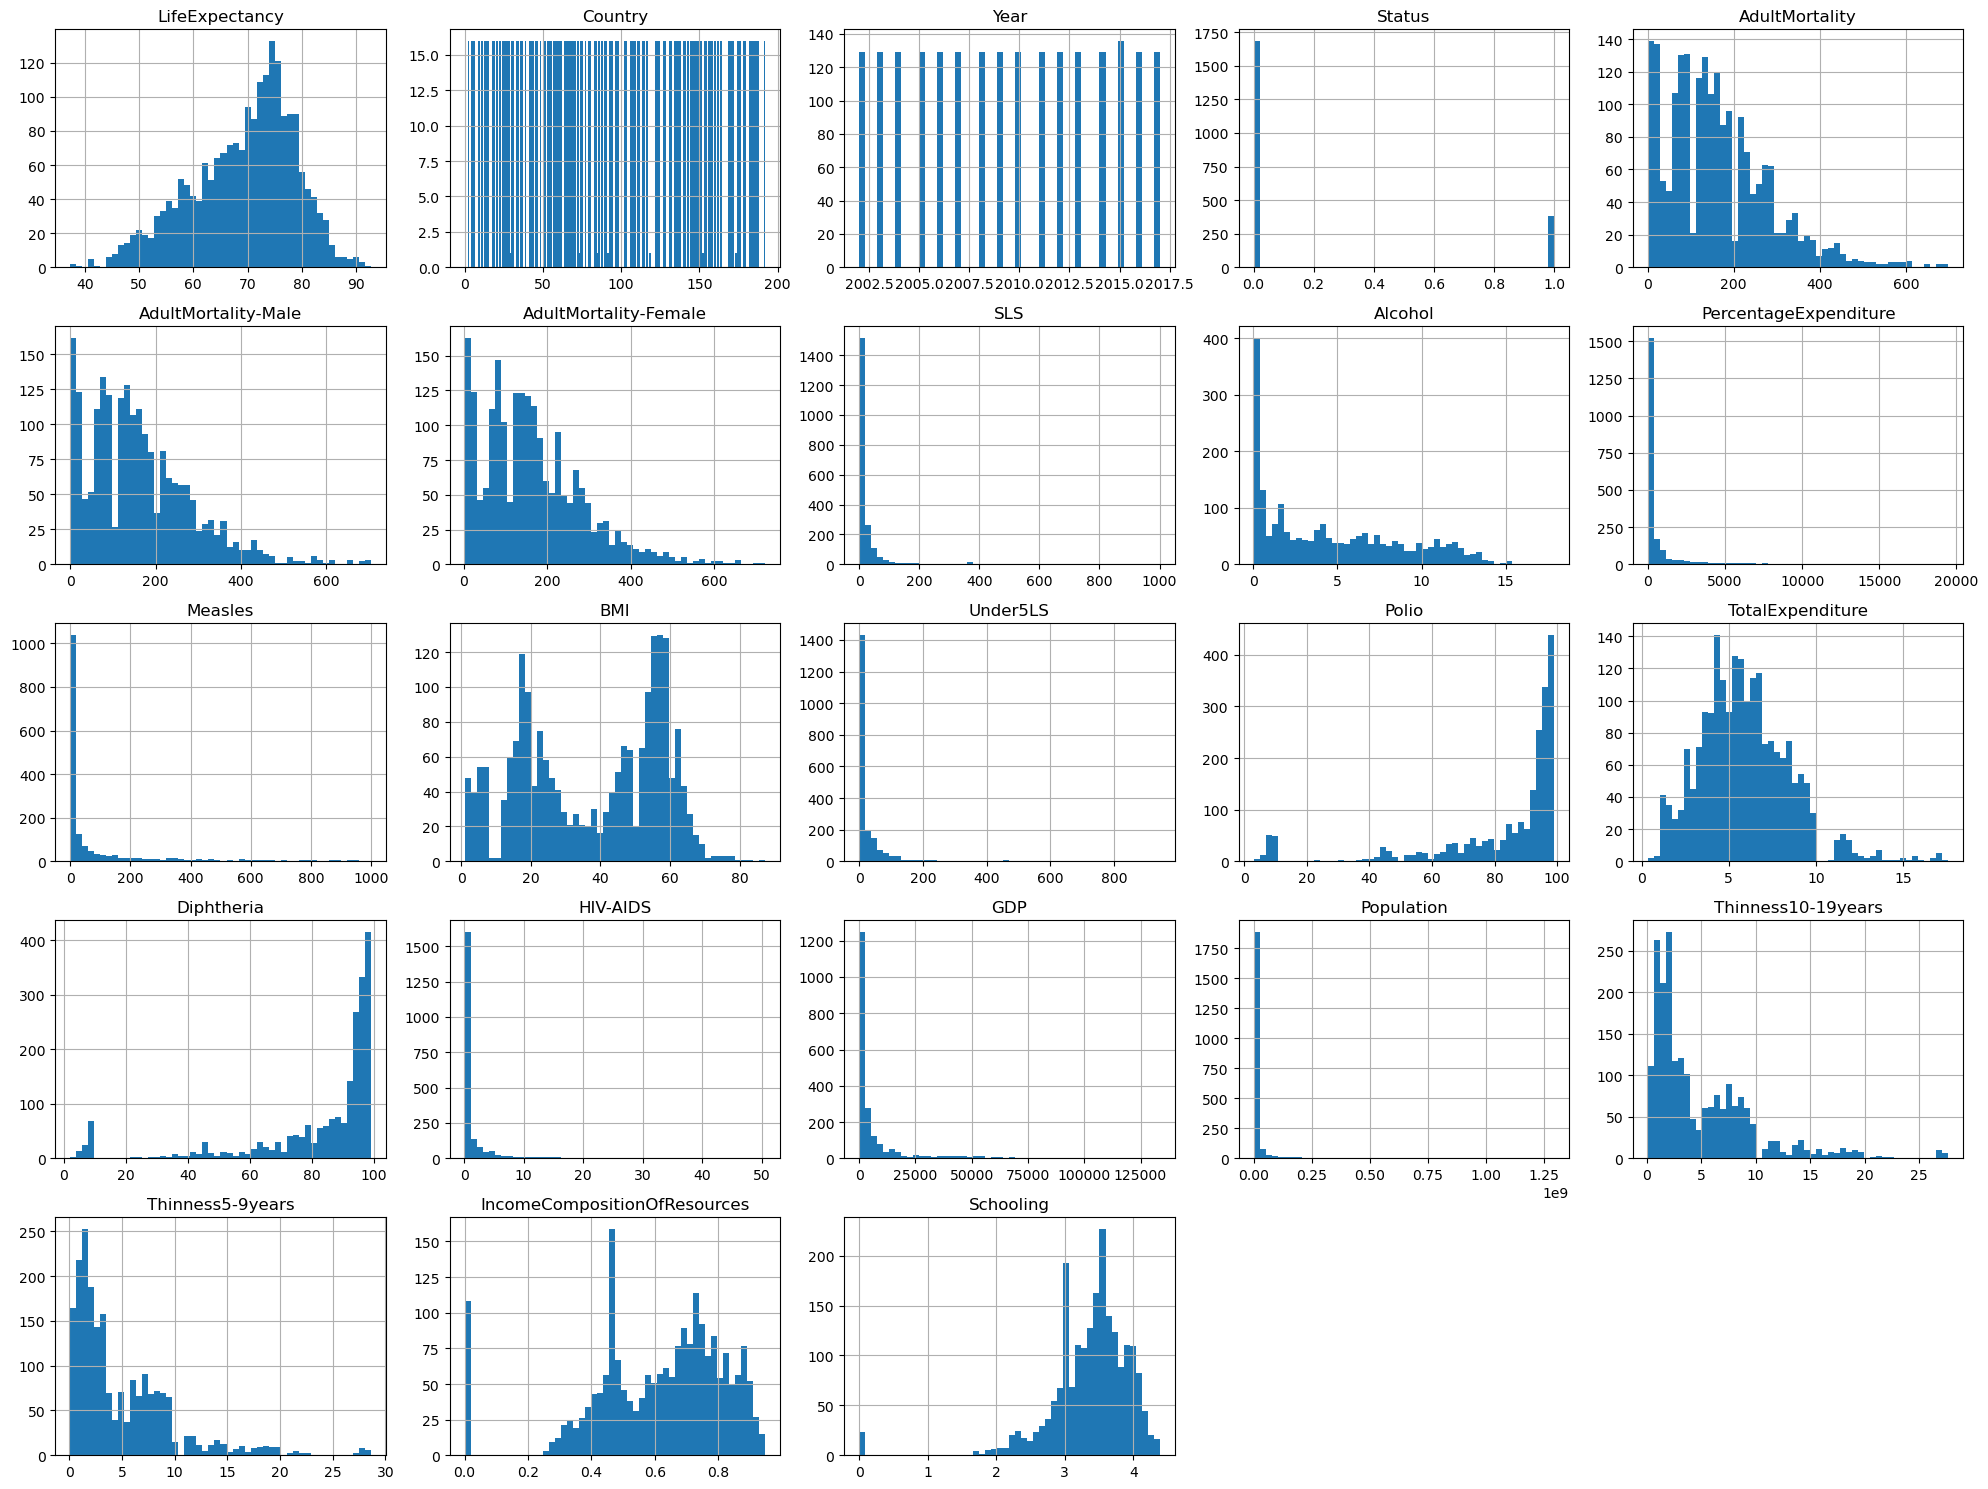

In [52]:
# Custom bins values
custom_bins = {
    'Country': 200,
}

exclude_column = "ID"  # Exclude ID

# List of columns where data points over 1000 should be excluded
exclude_columns_over_1000 = ['SLS', 'Measles', 'Under5LS']

# Plot histograms
fig, axes = plt.subplots(nrows=5, ncols=5, figsize=(20, 15))
axes = axes.flatten()

# Filter out the excluded column (ID)
filtered_columns = [col for col in train_data.columns if col != exclude_column]

for i, column in enumerate(filtered_columns):
    bins = custom_bins.get(column, 50)  # Use custom bins if available, otherwise default to 50
    
    # Exclude data points over 1000 for certain columns
    if column in exclude_columns_over_1000:
        data = train_data[column][train_data[column] <= 1000]
    else:
        data = train_data[column]
    
    data.hist(bins=bins, ax=axes[i])
    axes[i].set_title(column)

# Hide unused subplots (in case columns < grid size)
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

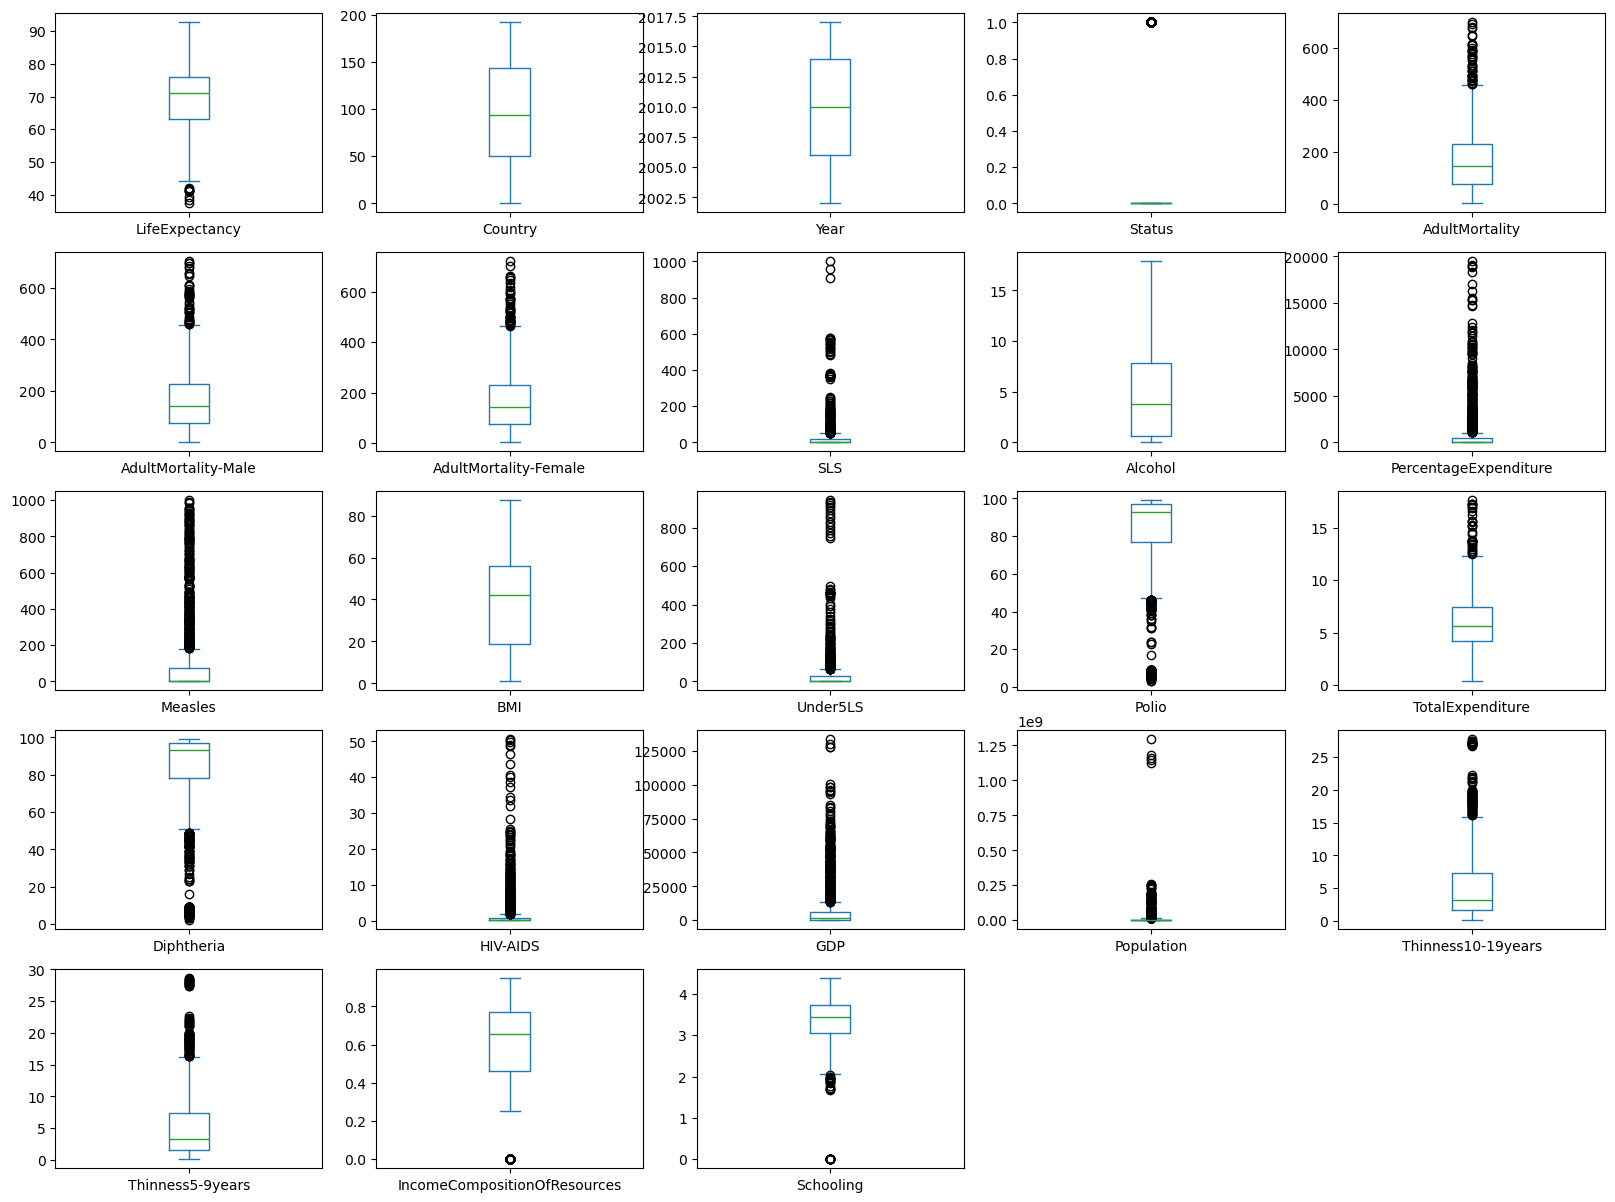

In [54]:
# Filter out the excluded column (ID) and apply the filtering for data points over 1000
filtered_data = train_data.drop(columns="ID").copy()

# Apply filtering for data points over 1000 for certain columns
for column in filtered_data.columns:
    if column in exclude_columns_over_1000:
        filtered_data[column] = filtered_data[column][filtered_data[column] <= 1000]

# Display box plot
filtered_data.plot(kind='box', subplots=True, layout=(5,5), sharex=False, sharey=False, figsize=(20, 15))
plt.show()

* `LifeExpectancy` has a normal distribution, which is a good sign for a target attribute, indicating consistency for training models and prediction.
* `Country` is a categorical attribute with 192 values, which are spreaded pretty evenly.
* `Status` is a categorical attribute with 2 values, with the majority of the values being 0 (Developing).
* Features like `GDP`, `Population` and `PercentageExpenditure` have very large values, while others like `Schooling` and `IncomeCompositionOfResources` are on a much smaller scale, indicating that scaling is necessary.
* Many features (`SLS`, `PercentageExpenditure`, `GDP`, `Alcohol`, `HIV/AIDS`, `Measles`, `Under5LS`, `Population`) show highly right-skewed distributions.
* Some features (`Polio`, `Diphtheria`) show left-skewed distributions.
* `BMI` appears to be bimodal.
* Some features (`Schooling`, `IncomeCompositionOfResources`) have normal-like distributions.

### ___2.4. Correlation between attributes___

Now that I have gained a good understanding of every attributes of this dataset, it is now the time to analyze the correlation between attributes by visualizing a correlation matrix and its values for each square. The following values are based on the Pearson correlation coefficient r.

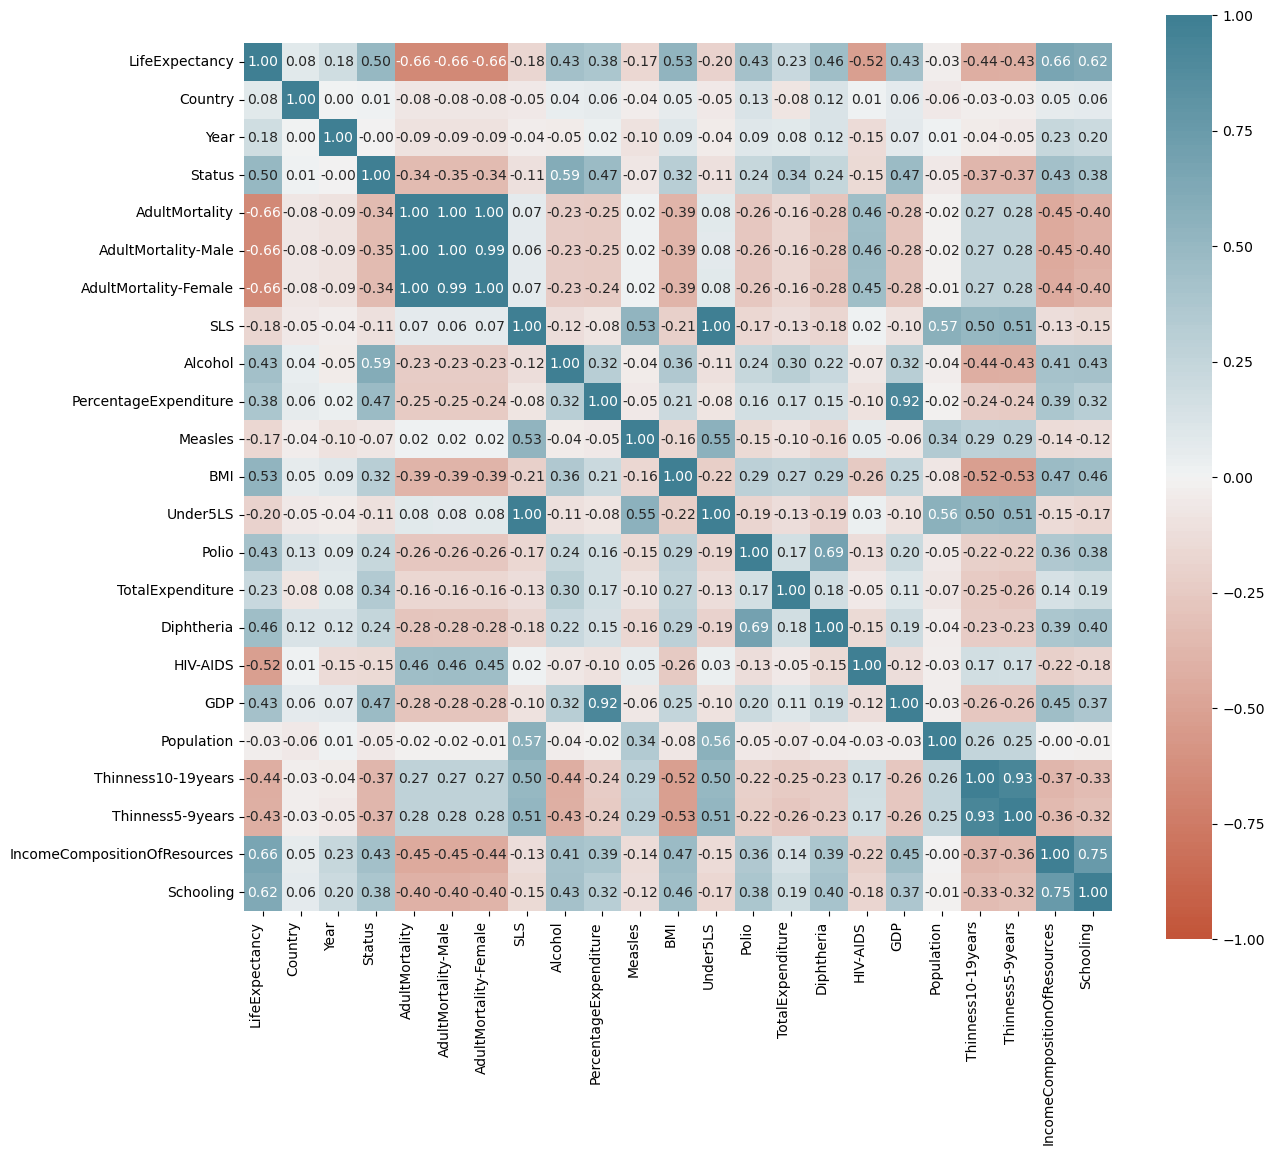

In [42]:
exclude_column = "ID"  # Column to exclude

# Compute correlation without the excluded column
corr = train_data.drop(columns=[exclude_column], errors='ignore').corr()

# Plot the heatmap
f, ax = plt.subplots(figsize=(14, 12))
sns.heatmap(
    corr, 
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True,
    annot=True,
    fmt=".2f"
)

ax.set_xticklabels(ax.get_xticklabels(), rotation=90, horizontalalignment='right')
plt.show()

___Insight:___
* `AdultMortality`, `AdultMortality-Male` and `AdultMortality-Female` has essentially the same correlation values to other attributes, possibly signifying the redundancy of the existence of the `AdultMortality-Male` and `AdultMortality-Female` attributes in comparision to `AdultMortality`.
* `LifeExpectancy` has a notable negative correlation to `AdultMortality` and positive correlations to `IncomeCompositionOfResources` and `Schooling`.
* `SLS` and `Under5LS` are also very similar in correlation values to other attributes, and in fact have perfect positive correlation to each other.
* `GDP` and `PercentageExpenditure` have a very high correlation to each other.
* `Thinness5-9years` and `Thinness10-19years` have a very high correlation to each other.

## ___3. Data Preparation___

After extensive analysis of the data, it is time to prepare the data to feed into machine learning models. We will primarily be using `ScikitLearn`(1.4.2) to help with the preperation process.

In [10]:
import sklearn
sklearn.__version__

'1.4.2'

### ___3.1. Remove unnecessary attributes___

There are three attributes that I am going to drop:
* ___ID:___ Self-explanatory, having an attribute whose only purpose is to index rows is not useful at all for training model.
* ___AdultMortality-Male, AdultMortality-Female:___ These two attributes are not distinct enough from `AdultMortality` to justifiably include into the model.

In [52]:
# Drop columns
life_expectancy_tr = train_data.drop(columns={"ID", "AdultMortality-Male", "AdultMortality-Female"})

### ___3.2. Remove inaccurate data___

As mentioned in the `Data overview` section of `Exploratory Data Analysis`, I will now proceed to remove the inaccurate data from columns containing them, which include `SLS`, `Measles`, `Under5LS` by replacing them with NaN values.

In [56]:
# Filter out the outlier data
life_expectancy_tr.loc[life_expectancy_tr['SLS'] > 1000, 'SLS'] = np.nan
life_expectancy_tr.loc[life_expectancy_tr['Measles'] > 1000, 'Measles'] = np.nan
life_expectancy_tr.loc[life_expectancy_tr['Under5LS'] > 1000, 'Under5LS'] = np.nan

* ___SLS:___ Removed all values which are over 1000.
* ___Measles:___ Removed all values which are over 1000.
* ___Under5LS:___ Removed all values which are over 1000.

### ___3.3. Data transformation:___

Before I use the dataset for training models, it is important to modify the dataset to better fit for training purposes. And the modification required are: 
* ___Filling in missing data:___ As observed in the `Data overview` section, several columns contain missing values, which can pose a challenge since machine learning models cannot handle incomplete data. To address this, I will impute the missing values by replacing them with the median values of their respective columns. This approach can be efficiently achieved using `SimpleImputer` from `sklearn`. The `SimpleImputer` will compute the median of each column and fill in any missing values accordingly, ensuring that the dataset is containing no null values.
* ___Feature scaling:___ Generally speaking, machine learning models do not perform well when attributes have noticeably different numerical scales among each other, so I am going to apply the standardization technique for all numerical attributes. The reason I am going with standardization and not normalization is because standardization is much less affected by outliers, which this dataset has plenty of. And I can achieve this by using the `StandardScaler` from `Sklearn`, which will apply the standardization formula to the selected attributes.
* ___Handling categorical attributes:___ Although the two categorical attributes, `Country` and `Status`, are in numerical form which would be fine for a model to take in, the fact that it is in numerical form implies an artificial hierarchy in these attributes. That is not the case for these two. Therefore, it feels fitting to convert these attributes to an appropriate format using different techniques. For `Status` I will use `OneHotEncoder` from `sklearn` to apply one-hot encoding. I cannot use the same technique for `Country` as there are 192 countries in this dataset, and applying one-hot encoding to it will produce a 192-dimensional feature space, which is computationally inefficient. Instead I will apply the target encoding technique with `TargetEncoder` from `sklearn`.

As I can see here, there are a lot of steps for data transformation. Fortunately, `sklearn` provided us a tool called `Pipeline` to apply all of these transformation steps with all the columns of the dataset.

In [61]:
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.pipeline import make_pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import TargetEncoder

# Define numerical attributes for standard scaling
standard_attribs = ["TotalExpenditure", "IncomeCompositionOfResources", "Schooling", "Year", "BMI", "Polio", 
                    "Diphtheria", "AdultMortality", "Thinness10-19years", "Thinness5-9years","SLS", "Alcohol", 
                    "PercentageExpenditure", "Measles", "Under5LS","HIV-AIDS", "GDP", "Population"]

# Pipeline for standardizing numerical features
standard_pipeline = make_pipeline(
    SimpleImputer(strategy="median"), # Fill missing values with the median
    StandardScaler()) # Standardize features to zero mean and unit variance

# Pipeline for encoding categorical target variables
target_pipeline = make_pipeline(
    SimpleImputer(strategy="most_frequent"), # Fill missing values with the most frequent category
    TargetEncoder() # Encode categorical values based on target variable
)

# Pipeline for one-hot encoding categorical features
onehot_pipeline = make_pipeline(
    SimpleImputer(strategy="most_frequent"), # Fill missing values with the most frequent category
    OneHotEncoder(handle_unknown="ignore") # Ignore unknown categories during transformation
)

# ColumnTransformer to apply different preprocessing steps to different feature types
preprocessing = ColumnTransformer([
    ("standard", standard_pipeline, standard_attribs), # Apply standardization to numerical attributes
    ("target", target_pipeline, ["Country"]),  # Apply target encoding to the 'Country' column
    ("onehot", onehot_pipeline, ["Status"]) # Apply one-hot encoding to the 'Status' column
])

Now that I have a pipeline that will process the dataset to an approriate format to be fed into the subsequent models.

## ___4. Evaluation Framework___

* ___Metric:___ The metric that I will be using to judge these models is RSME. It measures the difference between predicted and actual values in a regression model. It gives a single number that quantifies the model's error, with lower values indicating better performance. Additionally, RMSE is particularly useful because it penalizes larger errors more heavily than smaller ones by squaring the residuals before averaging. This makes it an effective metric when large deviations from the actual values are undesirable. Since RMSE is in the same units as the target variable, it is also more interpretable than MSE, making it easier to understand the magnitude of prediction errors. By choosing RMSE, I ensure that the selected model balances overall predictive accuracy while being sensitive to significant errors that could impact real-world applications.
* ___Evaluation method:___ To evaluate the performance of the models reliably, I will apply k-fold cross-validation using the `cross_val_score` function from `scikit-learn`. This technique helps estimate the model's ability to generalize to unseen data by splitting the dataset into k equally sized subsets (folds). In each iteration, the model is trained on k-1 folds and validated on the remaining fold. This process is repeated k times, ensuring that every data point is used for both training and validation. By averaging the results across all folds, we obtain a more stable and unbiased estimate of model performance, reducing the risk of overfitting. Since the evaluation metric is the Root Mean Squared Error (RMSE), I will use `scoring='neg_root_mean_squared_error'` in the cross_val_score function, following scikit-learn's convention of returning negative values for error metrics. The final RMSE score will be computed as the mean of all fold scores, providing a robust measure of the model’s predictive accuracy.
* ___Parameter tuning:___ For models containing parameter(s), I will be using the grid search methodology for models with relatively small number of parameters, and random search methodology for model with large amount of parameters. This process ensures that each model will have the best possible performance, greatly aiding for the process of making the ultimate judgement. I will use `GridSearchCV` and `RandomSearchCV` for grid search and random rearch respectively.

## ___5. Model Analysis___

After an extensive EDA process, I have decided to go with 3 types of machine learning models: Linear Regression, Ridge Regression and Random Forest. Explanation of the model and the rationale behind the decision will be given at the designated section for each model.

In [68]:
from sklearn.model_selection import cross_val_score, KFold

# Define a K-Fold cross-validation strategy with 5 splits
# shuffle=True ensures randomness in splitting, and random_state=42 ensures reproducibility
kfold = KFold(n_splits=5, shuffle=True, random_state=42)

# Function to compute RMSE using cross-validation
# The negative RMSE is used because cross_val_score returns negative values for error metrics
def rmse_cross_val(model, X, y):
    return -cross_val_score(model, X, y, scoring="neg_root_mean_squared_error", cv=kfold)

# Function to summarize RMSE values from cross-validation
# Returns descriptive statistics like mean, std, min, and max
def describe_rmse(rmse):
    return pd.Series(rmse).describe()

But first, I will need to split the data into two, the features and the label, or X and y.

In [71]:
# Remove the target column 'LifeExpectancy' from the training data (X), forming the features
life_expectancy_tr_X = life_expectancy_tr.drop('LifeExpectancy', axis=1)
# Extract the 'LifeExpectancy' column as the target variable (y), forming the target variable
life_expectancy_tr_y = life_expectancy_tr['LifeExpectancy'].copy()

### ___5.1. Linear Regression___

The basis of all regression models, it is the simplest out of the regression models. It assumes a linear relationship between the input features and the output. Linear regression is simple, interpretable, and serves as a baseline model to compare against more complex approaches.

In [168]:
# Define a function for preprocessing a single attribute (column) 
def uni_preprocessing(attribute):
    return ColumnTransformer([
        # Apply a standard preprocessing pipeline to the specified attribute
        ("standard", standard_pipeline, attribute)
    ])

In [170]:
from sklearn.linear_model import LinearRegression

# Create a pipeline for multiple features with preprocessing and Linear Regression model
lin_multi_reg = make_pipeline(preprocessing, LinearRegression())
# Create a pipeline for Linear Regression with only 'AdultMortality' as the feature
lin_uniAD_reg = make_pipeline(uni_preprocessing(['AdultMortality']), LinearRegression())
# Create a pipeline for Linear Regression with only 'IncomeCompositionOfResources' as the feature
lin_uniICOR_reg = make_pipeline(uni_preprocessing(['IncomeCompositionOfResources']), LinearRegression())
# Create a pipeline for Linear Regression with only 'Schooling' as the feature
lin_uniS_reg = make_pipeline(uni_preprocessing(['Schooling']), LinearRegression())

I will be experimenting with two approachs, and compare them against each other to determine the route going forward. They are univariate linear regression and multivariate linear regression.
* ___Univariate regression:___ This approach use a single independant variable to try predicting the target variable. I have identified three attributes for this approach: `AdultMortality`, `IncomeCompositionOfResource` and `Schooling`. All three of them has either a positive or a negative correlation values at around the 60s.
* ___Multivariate regression:___ This approach use all of the available variables to try predicting the target variable.

In [68]:
# Cross-validation for linear regression using only 'AdultMortality' as input feature
lin_reg_uniAD_cross_val = rmse_cross_val(lin_uniAD_reg, life_expectancy_tr_X[['AdultMortality']], life_expectancy_tr_y)
# Cross-validation for linear regression using only 'IncomeCompositionOfResources' as input feature
lin_reg_uniICOR_cross_val = rmse_cross_val(lin_uniICOR_reg, life_expectancy_tr_X[['IncomeCompositionOfResources']], life_expectancy_tr_y)
# Cross-validation for linear regression using only 'Schooling' as input feature
lin_reg_uniS_cross_val = rmse_cross_val(lin_uniS_reg, life_expectancy_tr_X[['Schooling']], life_expectancy_tr_y)
# Cross-validation for linear regression using all features (multi-feature regression)
lin_reg_multi_cross_val = rmse_cross_val(lin_multi_reg, life_expectancy_tr_X, life_expectancy_tr_y)

In [69]:
# Creating a DataFrame to store the RMSE results of different linear regression models
lin_reg_results = pd.DataFrame({
    'Univariate Regression (AdultMortality)': describe_rmse(lin_reg_uniAD_cross_val),
    'Univariate Regression (IncomeCompositionOfResources)': describe_rmse(lin_reg_uniICOR_cross_val),
    'Univariate Regression (Schooling)': describe_rmse(lin_reg_uniS_cross_val),
    'Multivariate Regression': describe_rmse(lin_reg_multi_cross_val),
})

# Transpose the DataFrame to switch rows and columns for better readability
lin_reg_results = lin_reg_results.transpose()

print(lin_reg_results.to_string(index=True))

                                                      count      mean       std       min       25%       50%       75%       max
Univariate Regression (AdultMortality)                  5.0  7.095629  0.137131  6.922433  6.993145  7.145276  7.150728  7.266564
Univariate Regression (IncomeCompositionOfResources)    5.0  7.144636  0.248755  6.908886  6.915767  7.092088  7.364068  7.442369
Univariate Regression (Schooling)                       5.0  7.443838  0.346635  7.208790  7.284598  7.303725  7.366370  8.055708
Multivariate Regression                                 5.0  3.026861  0.252485  2.712744  2.838445  3.068625  3.176853  3.337638


___Analysis:___
* All of the univariable models perform similarly to each others, having the score around the 7s range.
* The multivariate regression model outperform all the others by a significant amount, achieving an impressive score of 3.026.

In summary, going forward I will be approaching all subsequent models with the multivariate approach.

There is one more variation of Linear Regression I want to experiment with, and that is the Polynomial Linear Regression variant. It is an extension of linear regression where the relationship between the independent variables and the target variable is modeled as an nth-degree polynomial, instead of just a straight line. While linear regression fits a straight line to the data, polynomial regression fits a curve by introducing additional polynomial terms of the input features. I will be testing with degree 2 and 3 as I feel these values would be approriate for this kind of dataset, and it would also avoid overfitting than if we go with a higher degree.

I will be creating 2 custom variants of the pre-existing pipeline `preprocessing` by adding a new function to apply polynomial features, one for 2 degree and the other for 3 degree.

In [73]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import Pipeline

# Creating a pipeline for preprocessing with Polynomial Features (degree 2) and Standard Scaler
poly_2_standard_pipeline = make_pipeline(SimpleImputer(strategy="median"), PolynomialFeatures(2),StandardScaler())

# Creating a pipeline for preprocessing with Polynomial Features (degree 3) and Standard Scaler
poly_3_standard_pipeline = make_pipeline(SimpleImputer(strategy="median"), PolynomialFeatures(3),StandardScaler())

# Defining preprocessing steps for the dataset, using Polynomial Features of degree 2
poly_2_preprocessing = ColumnTransformer([
    ("poly_2_standard", poly_2_standard_pipeline, standard_attribs),
    ("target", target_pipeline, ["Country"]),
    ("onehot", onehot_pipeline, ["Status"])
])

# Defining preprocessing steps for the dataset, using Polynomial Features of degree 3
poly_3_preprocessing = ColumnTransformer([
    ("poly_3_standard", poly_3_standard_pipeline, standard_attribs),
    ("target", target_pipeline, ["Country"]),
    ("onehot", onehot_pipeline, ["Status"])
])

In [74]:
# Creating a pipeline for linear regression with Polynomial Features (degree 2)
lin_reg_poly_2 = make_pipeline(poly_2_preprocessing, LinearRegression())
# Creating a pipeline for linear regression with Polynomial Features (degree 3)
lin_reg_poly_3 = make_pipeline(poly_3_preprocessing, LinearRegression())

In [75]:
# Perform cross-validation to evaluate the RMSE for the linear regression model with polynomial features (degree 2)
lin_reg_poly_2_cross_val = rmse_cross_val(lin_reg_poly_2, life_expectancy_tr_X, life_expectancy_tr_y)
# Perform cross-validation to evaluate the RMSE for the linear regression model with polynomial features (degree 3)
lin_reg_poly_3_cross_val = rmse_cross_val(lin_reg_poly_3, life_expectancy_tr_X, life_expectancy_tr_y)

In [76]:
# Create a DataFrame to store and summarize the cross-validation RMSE results for polynomial regression models
poly_results = pd.DataFrame({
    'Polynomial Regression (degree=2)': describe_rmse(lin_reg_poly_2_cross_val),
    'Polynomial Regression (degree=3)': describe_rmse(lin_reg_poly_3_cross_val)
})

# Transpose the DataFrame to switch rows and columns for better readability
poly_results = poly_results.transpose()

print(poly_results.to_string(index=True))

                                  count          mean           std         min         25%         50%          75%           max
Polynomial Regression (degree=2)    5.0      4.162509      2.212203    2.829593    3.027179     3.37973     3.484504      8.091541
Polynomial Regression (degree=3)    5.0  12859.265079  26304.325967  591.582167  915.121715  1086.40412  1795.950549  59907.266843


___Analysis:___
* The 2-degree version performs worse than regular linear regression, as it has worse score, and the standard deviation is high, indicating inconsistency.
* The 3-degree version has an absolutely horrible performance, having a score blatantly off the scale. Needless to say, it is not in the consideration at all.

___Conclusion:___ After extensive analysis, I will go with the multivariate linear regression model as it performs the best out of all of the linear models. This will also mean that for the next section, `Ridge Regression`, it will be using the multivariate and non-polynomial method.

### ___5.2. Ridge Regression___

A variant on linear regression, this method include a L2 regularization to prevent overfitting. It adds a penalty term to the loss function, which helps shrink the model coefficients and improves generalization, especially when dealing with multicollinearity. The reason I went with Ridge instead of the alternative, Lasso, is because Ridge handles multicollinearity better and tends to perform well when all features contribute to the model, even if minimally. It prevents overfitting by shrinking the coefficients without eliminating any of the features, which is crucial for maintaining the integrity of the model when dealing with highly correlated predictors.

For the parameter of the Ridge Regression (alpha), I will be using `GridSearchCV` from `sklearn` to quickly search through a range of the parameter, calculating the score from `cross_val_score` and extracting the best parameter from the search. The parameter I will be searching over is from 0.001 to 1000, using a logarithmic scale to efficiently explore both small and large values. There will be 20 data points used for testing.

The range of 0.001 to 1000 is selected to capture both weak and strong regularization effects, avoiding under- and over-penalization. Using 20 logarithmically spaced points provides a good trade-off between search resolution and computational efficiency.

Best alpha: 54.555947811685144
Best CV Score (RMSE): 3.020153854238972


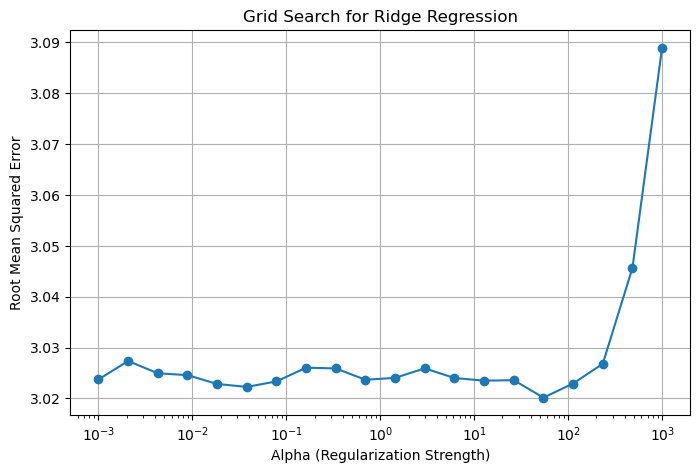

In [82]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV

# Define the parameter grid to search over
param_grid = {
    'ridge__alpha': np.logspace(-3, 3, 20) # Alpha values for regularization strength on a log scale
}

# Create a pipeline with preprocessing steps and Ridge regression
rid_reg = make_pipeline(preprocessing, Ridge())

# Set up GridSearchCV to search the best hyperparameter (alpha) using cross-validation
grid_search = GridSearchCV(rid_reg, param_grid, cv=kfold, scoring='neg_root_mean_squared_error')

# Fit the grid search on the training data
grid_search.fit(life_expectancy_tr_X, life_expectancy_tr_y)

# Print the best regularization strength (alpha) and the best cross-validation RMSE score
print("Best alpha:", grid_search.best_params_['ridge__alpha'])
print("Best CV Score (RMSE):", -grid_search.best_score_)

# Get mean test scores
mean_scores = -grid_search.cv_results_['mean_test_score']

# Plot the relationship between alpha and RMSE
plt.figure(figsize=(8, 5))
plt.semilogx(np.logspace(-3, 3, 20), mean_scores, marker='o', linestyle='-')
plt.xlabel('Alpha (Regularization Strength)')
plt.ylabel('Root Mean Squared Error')
plt.title('Grid Search for Ridge Regression')
plt.grid(True)
plt.show()

___Analysis:___
* Based on the plot of alpha values versus RMSE scores, the RMSE remains consistently between 3.02 and 3.03 for alpha values ranging from $10^{-3}$ to $10^{2}$. However, for alpha values larger than $10^{2}$, the RMSE starts to increase noticeably.
* The best RMSE achieved by Ridge Regression is approximately 3.020, slightly lower than that of Linear Regression, which was around 3.024. This suggests that Ridge Regression has the potential to outperform Linear Regression when properly tuned.

### ___5.3. Random Forest Regression___

For the penultimate model I will be evaluating for this project, I have chosen to use the Random Forest algorithm. This decision is based on its ability to handle high-dimensional data, reduce overfitting through averaging, and provide strong predictive performance with minimal hyperparameter tuning. Additionally, Random Forest offers interpretable feature importance measures, which will be valuable for understanding the factors influencing the model's predictions. Given the characteristics of my dataset and the need for a reliable and generalizable model, Random Forest is well-suited for this task.

Random Forest is an ensemble learning method that builds multiple decision trees and combines their outputs to make more accurate and stable predictions. It works by training each tree on a random subset of the data and features, which helps reduce overfitting and improve generalization. The final prediction is obtained by averaging the outputs (for regression) or taking a majority vote (for classification) from all the trees. Random Forest is known for its robustness, ability to handle high-dimensional data, and built-in feature importance evaluation.

In [81]:
from sklearn.ensemble import RandomForestRegressor

# Create a pipeline with preprocessing steps followed by a Random Forest Regressor
rf_reg = make_pipeline(preprocessing, RandomForestRegressor(random_state=42))

In [83]:
# Perform cross-validation for the RandomForestRegressor model
rfr_cross_val = rmse_cross_val(rf_reg, life_expectancy_tr_X, life_expectancy_tr_y)
# Describe the statistics of the cross-validation RMSE results
describe_rmse(rfr_cross_val)

count    5.000000
mean     2.790462
std      0.187190
min      2.544164
25%      2.669460
50%      2.799028
75%      2.955047
max      2.984611
dtype: float64

Even when using the default parameters provided by `RandomForestRegressor` from `sklearn`, this model already outperforms the best results achieved by Ridge Regression by approximately 0.2 points, which is quite impressive. Building on this strong baseline, I will now perform a random search to further optimize the Random Forest's hyperparameters and identify the best combination of parameters for this dataset.

I chose to use random search instead of grid search because, unlike Ridge Regression which has only a few tunable parameters, Random Forest comes with a relatively large set of hyperparameters. Conducting a full grid search over all possible parameter combinations would be computationally inefficient and time-consuming. In contrast, random search provides a more practical and efficient approach by exploring a random subset of the parameter space, often leading to near-optimal results with much less computational effort.

Although there are many parameters available in Random Forest, I will limit the amount of parameters explored to three, as focusing on the most impactful ones allows for efficient hyperparameter tuning, preventing overfitting and ensuring the model generalizes well to unseen data. These parameters are:
* ___n_estimators:___ The number of trees in the forest. I will be testing with a range from 100 to 300. More trees generally improve performance by reducing variance, but too many can lead to diminishing returns and increased computation time.
* ___max_depth:___ The maximum depth of the tree. I will be testing with a range from 0 to 30. Deeper trees can capture more complexity but risk overfitting, while shallow trees may underfit. Finding the right depth helps balance model complexity and generalization.
* ___max_features:___ The number of features to consider when looking for the best split. I will be using a range from 3 to 50. Limiting features at each split reduces overfitting by increasing tree diversity, improving generalization to unseen data.

In [85]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint

# Define the distribution of hyperparameters to sample during the random search
param_dist = {
    'randomforestregressor__max_features': randint(3, 50), # Randomly sample max_features between 3 and 50
    'randomforestregressor__max_depth': randint(0, 30), # Randomly sample max_depth between 0 and 30
    'randomforestregressor__n_estimators': randint(100, 300) # Randomly sample n_estimators between 100 and 300
}

# Initialize the RandomizedSearchCV with the RandomForestRegressor pipeline
# n_iter specifies how many different hyperparameter combinations will be tested
random_search = RandomizedSearchCV(
    rf_reg, param_distributions=param_dist, n_iter=30, cv=kfold,
    scoring='neg_root_mean_squared_error', random_state=42
)

# Fit the random search model on the training data to find the best parameters
random_search.fit(life_expectancy_tr_X, life_expectancy_tr_y)

# Output the best parameters and best RMSE score from cross-validation
print("Best params:", random_search.best_params_)
print("Best CV Score (RMSE):", -random_search.best_score_)

Best params: {'randomforestregressor__max_depth': 10, 'randomforestregressor__max_features': 10, 'randomforestregressor__n_estimators': 288}
Best CV Score (RMSE): 2.760562754970229


After completing the hyperparameter tuning process, I have identified the optimal combination of parameters for the Random Forest model, resulting in the best possible performance, with the best RMSE score is 2.76, better than the default setting by 0.5 point.

### ___5.4. Gradient Boosting Regression___

For the final model evaluation in this project, I have chosen to use the Gradient Boosting algorithm. Gradient Boosting is a powerful ensemble learning method that sequentially builds decision trees, with each tree correcting the errors of the previous ones. This iterative approach allows the model to improve its predictive performance while maintaining flexibility and robustness. Compared to Random Forest, Gradient Boosting often achieves better accuracy by focusing on difficult-to-predict samples, albeit at the cost of increased training time and sensitivity to hyperparameter tuning.

Gradient Boosting works by minimizing a specified loss function using gradient descent. At each iteration, a new weak learner (decision tree) is added to the ensemble to correct the residual errors of the current model. This process continues until a specified number of trees is reached or performance improvements stagnate. Unlike bagging methods like Random Forest, which reduce variance, boosting methods aim to reduce bias while maintaining a controlled level of variance.

In [73]:
from sklearn.ensemble import GradientBoostingRegressor

# Create a pipeline with preprocessing steps followed by a Gradient Boosting Regressor
gb_reg = make_pipeline(preprocessing, GradientBoostingRegressor(random_state=42))

# Perform cross-validation for the GradientBoostingRegressor model
gbr_cross_val = rmse_cross_val(gb_reg, life_expectancy_tr_X, life_expectancy_tr_y)

# Describe the statistics of the cross-validation RMSE results
describe_rmse(gbr_cross_val)

count    5.000000
mean     2.838254
std      0.206330
min      2.557112
25%      2.689734
50%      2.914409
75%      2.993724
max      3.036290
dtype: float64

Initial results indicate that Gradient Boosting performs similarly to Random Forest but with slightly worse RMSE scores. Given its strong baseline performance, I will proceed with hyperparameter tuning to further enhance its predictive accuracy.

Hyperparameter tuning is particularly important for Gradient Boosting due to its sequential learning process, which makes it more prone to overfitting if parameters are not well-optimized. To achieve an optimal balance between bias and variance, I will conduct a random search over three key hyperparameters:

* ___n_estimators:___ The number of boosting stages to be performed. I will test a range from 100 to 400. More boosting stages generally improve performance but increase training time and risk overfitting.
* ___learning_rate:___ Controls the contribution of each tree to the final prediction. I will explore values between 0.05 and 0.2. Lower values make the model more robust but require more boosting stages to converge.
* ___max_depth:___ The maximum depth of individual trees. I will test values between 3 and 8 to balance model complexity and generalization.

In [78]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint, uniform

# Define the distribution of hyperparameters to sample during the random search
param_dist = {
    'gradientboostingregressor__n_estimators': randint(100, 400), # Sample n_estimators between 100 and 400
    'gradientboostingregressor__learning_rate': uniform(0.05, 0.15), # Sample learning_rate between 0.05 and 0.15
    'gradientboostingregressor__max_depth': randint(3, 8) # Sample max_depth between 3 and 8
}

# Initialize the RandomizedSearchCV with the GradientBoostingRegressor pipeline
random_search = RandomizedSearchCV(
    gb_reg, param_distributions=param_dist, n_iter=30, cv=kfold,
    scoring='neg_root_mean_squared_error', random_state=42
)

# Fit the random search model on the training data to find the best parameters
random_search.fit(life_expectancy_tr_X, life_expectancy_tr_y)

# Output the best parameters and best RMSE score from cross-validation
print("Best params:", random_search.best_params_)
print("Best CV Score (RMSE):", -random_search.best_score_)

Best params: {'gradientboostingregressor__learning_rate': 0.052345461011179095, 'gradientboostingregressor__max_depth': 3, 'gradientboostingregressor__n_estimators': 228}
Best CV Score (RMSE): 2.8097396830527757


After optimizing the hyperparameters, the best RMSE score achieved by Gradient Boosting is 2.80, which is an improvement over the default settings but still slightly worse than the tuned Random Forest model by approximately 0.4 points.

## ___6. Ultimate Judgement___

After conducting a thorough evaluation of all the models, I can draw a final conclusion based on the metrics such as RMSE and cross-validation scores of which I assessed their performance.

Linear regression performed reasonably well, and adding polynomial features did not provide a significant performance boost, indicating that the relationships within the data were primarily linear. Introducing regularization in the form of ridge regression improved the performance slightly by controlling overfitting, and gave the option to search over a range of the alpha parameter to find the best possible result. Random forest, on the other hand, outperformed all of the evaluated models by quite a noticeable margin and had many more parameters to experiment with when tuning. Gradient boosting also delivered strong performance, closely matching that of random forest, but ultimately fell just short in terms of RMSE. Despite this, it remains a highly competitive choice, particularly when fine-tuned properly, as it excels at identifying difficult-to-predict patterns.

Therefore, the ultimate judgement for this project is that the random forest regression model is the best choice. This model is able to learn complex, non-linear interactions among the features and is therefore incredibly powerful when standard linear models fall short. By employing the ensemble learning method, random forests reduce the risk of overfitting and improve generalization, such that the model performs well on new data. Also, its ability to handle datasets with a large number of features, without a loss of accuracy, makes it suitable for this project. Gradient boosting remains a strong alternative, offering a different approach to improving prediction accuracy by sequentially correcting errors, making it particularly useful for datasets with subtle patterns that require iterative refinement.

There are some limitations, however, in using these models. First, both random forest and gradient boosting can be computationally intensive, especially when the number of trees and the depth of each tree are high. This could be an issue in systems with limited computational capabilities or where model training time is valuable. Second, while random forests and gradient boosting offer high predictive accuracy, they are less interpretable than more straightforward models like linear regression, making it harder to explain specific predictions to stakeholders. Finally, both methods are still susceptible to overfitting if hyperparameters are not adequately tuned, particularly when working with noisy data.

In conclusion, the random forest regression model would be the best choice for this project since it offers improved performance on key metrics and can process intricate relationships between data effectively. However, gradient boosting remains a very strong contender, offering comparable predictive power with the potential to outperform random forest in certain scenarios. Despite their computational and interpretability challenges, both models' effectiveness in improving prediction accuracy justifies their use in real-world applications.

## ___7. Test Dataset Prediction___

For this section, I will generate a prediction sheet based on the given test dataset. The model I will be using is the best model identified from ultimate judgement, Random Forest Regression. The parameters this model will be using is the one discovered to be the best in the hyper-parameter tuning section for this model.

In [139]:
# Extract the best model found during the random search
final_model = random_search.best_estimator_
# Use the best model to make predictions on the test data
predictions = final_model.predict(test_data)

In [145]:
# Create a DataFrame with the 'ID' from test_data and the predicted 'LifeExpectancy' values
output = pd.DataFrame({'ID': test_data["ID"],'TARGET_LifeExpectancy': predictions})
# Save the output DataFrame to a CSV file without including the index column
output.to_csv('s4019548_prediction.csv', index=False)